In [1]:
import math
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pprint
import pandas as pd

In [2]:
pp = pprint.PrettyPrinter()

In [3]:
def f(x, y):
    return y / (x ** 2) + math.exp(x - 1 / x)

In [4]:
a = 1
b = 2
k = [1, 2] # h = 1 / 10 ^ k
y0 = 1.367879

In [5]:
def createHandXR(k, a, b):
    h = 1 / 10 ** k if type(k) == int else k
    x_r = list(range(int((b - a) / h) + 1))
    x_r = list(np.round(np.interp(x_r, [x_r[0], x_r[-1]], [a, b]), k if type(k) == int else 1))
    return h, x_r

In [6]:
h1, x_r1 = createHandXR(k[0], a, b)
h2, x_r2 = createHandXR(k[1], a, b)

In [7]:
def elr(x_r, y0, h, f, r=6):
    y = [y0]
    for x in x_r:
        y.append(round(y[-1] + h * f(x, y[-1]), r))
    return y[:-1]

def elr_edited(x_r, y0, h, f, r=6):
    y = [y0]
    for x in x_r:
        y.append(round(y[-1] + (h / 2) * (f(x, y[-1]) + f(x + h, y[-1] + h * f(x, y[-1]))), r))
    return y[:-1]

In [8]:
pp.pprint(['f({0}) ≃ {1}'.format(x, y) for x, y in list(zip(x_r1, elr(x_r1, y0, h1, f)))])

['f(1.0) ≃ 1.367879',
 'f(1.1) ≃ 1.604667',
 'f(1.2) ≃ 1.858319',
 'f(1.3) ≃ 2.131661',
 'f(1.4) ≃ 2.427819',
 'f(1.5) ≃ 2.750206',
 'f(1.6) ≃ 3.102535',
 'f(1.7) ≃ 3.488844',
 'f(1.8) ≃ 3.913537',
 'f(1.9) ≃ 4.381426',
 'f(2.0) ≃ 4.897783']


In [9]:
pp.pprint(['f({0}) ≃ {1}'.format(x, y) for x, y in list(zip(x_r1, elr_edited(x_r1, y0, h1, f)))])

['f(1.0) ≃ 1.367879',
 'f(1.1) ≃ 1.613099',
 'f(1.2) ≃ 1.877261',
 'f(1.3) ≃ 2.163268',
 'f(1.4) ≃ 2.47433',
 'f(1.5) ≃ 2.813961',
 'f(1.6) ≃ 3.185998',
 'f(1.7) ≃ 3.59463',
 'f(1.8) ≃ 4.04444',
 'f(1.9) ≃ 4.540452',
 'f(2.0) ≃ 5.088183']


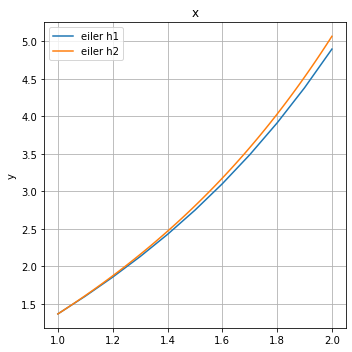

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_r1, elr(x_r1, y0, h1, f), label='eiler h1')
ax.plot(x_r2, elr(x_r2, y0, h2, f), label='eiler h2')
ax.set_title('x')
ax.legend(loc='upper left')
ax.set_ylabel('y')

fig.tight_layout()
plt.grid() 
plt.show()

In [15]:
d2 = {key: val for key, val in zip(x_r2, elr(x_r2, y0, h2, f))}

for x, y1, y2 in zip(x_r1, elr(x_r1, y0, h1, f), elr_edited(x_r1, y0, h1, f)):
#     print(d2[x], y1, y1, x)
    try:
        dlt = (y1 - d2[x]) / (y2 - d2[x])
        print(f'погрешность для x = {x}: {dlt}')
    except:
        print(f'division by zero for x = {x}')

division by zero for x = 1.0
погрешность для x = 1.1: -9.936446173799158
погрешность для x = 1.2: -9.671549295774163
погрешность для x = 1.3: -9.458967571144713
погрешность для x = 1.4: -9.292321310024015
погрешность для x = 1.5: -9.15530423701815
погрешность для x = 1.6: -9.037642814191141
погрешность для x = 1.7: -8.935756551141113
погрешность для x = 1.8: -8.846032342986536
погрешность для x = 1.9: -8.764583077489847
погрешность для x = 2.0: -8.690060562878367


In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_r1, elr_edited(x_r1, y0, h1, f), label='eiler edited h1')
ax.plot(x_r2, elr_edited(x_r2, y0, h2, f), label='eiler edited h2')
ax.set_title('x')
ax.legend(loc='upper left')
ax.set_ylabel('y')

fig.tight_layout()
plt.grid() 
plt.show()

In [ ]:
h3, x_r3 = createHandXR(0.2, a, b)

In [ ]:
x_r3

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_r3, elr(x_r3, y0, h3, f), label='eiler h3')
ax.plot(x_r3, elr_edited(x_r3, y0, h3, f), label='eiler edited h3')
ax.set_title('x')
ax.legend(loc='upper left')
ax.set_ylabel('y')

fig.tight_layout()
plt.grid() 
plt.show()

In [ ]:
d2 = {key: val for key, val in zip(x_r2, elr(x_r2, y0, h2, f))}

In [ ]:
t1 = [round((y1 - y2) / h1, 6) for y1, y2 in zip(elr(x_r1, y0, h1, f), [d2[x] for x in x_r1])]
t2 = [round((y1 - y2) / h1, 6) for y1, y2 in zip(elr(x_r3, y0, h3, f), [d2[x] for x in x_r3])]

In [ ]:
table = []
for i, x in enumerate(x_r1):
    if x in x_r3:
        table.append((x, t1[i], t2[x_r3.index(x)]))
    else:
        table.append((x, t1[i], None))

In [ ]:
pd.DataFrame(table, columns=['X', 'Погрешность для 0.1', 'Погрешность для 0.2'])